https://finance.yahoo.com/quote/SSRM?p=SSRM&.tsrc=fin-srch

https://algotrading101.com/learn/yahoo-finance-api-guide/

https://trading-data-analysis.pro/trading-using-python-simple-moving-average-sma-8713caf0d4ee

https://charticulator.com/app/index.html

https://dash.plotly.com/basic-callbacks

Every time the SMA50 crosses above the SMA200 we know that the market is in an **upward trend**, 
and when the SMA50 crosses below the SMA200 it is a **downward trend**. 

When the SMA50 crosses above the SMA200 it’s known as the “Golden Cross”, and when the SMA50 crosses below the SMA200 it is known as the “Death Cross”. When this event occurs it usually is followed by a strong price movement.

In [1]:
import json
import urllib.request
import yfinance as yf
import pandas as pd
import numpy as np

# importing pyplot from matplotlib as plt
# for plotting graphs
import matplotlib.pyplot as plt
plt.style.use('default')
%matplotlib inline

In [2]:
#define moving average function
def moving_avg(x, n):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[n:] - cumsum[:-n]) / float(n)


In [16]:
# stock = yf.Ticker("VWS.CO")
# stock = yf.Ticker("K")
# stock = yf.Ticker("ACKB.BR") # Ackermans&van Haaren (COnstruction/Engineering)
stock = yf.Ticker("RUI.PA") # Rubis (Gas)

# stock = yf.Ticker("0P0000FYPU.F")
# stock = yf.Ticker("SSRA.SG")


# print(stock.info)
hist = stock.history(period="max")
hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2000-01-03 00:00:00+01:00,2.284091,2.302364,2.270387,2.276782,51637,0.0,0.0
2000-01-04 00:00:00+01:00,2.284091,2.311500,2.275868,2.302364,48389,0.0,0.0
2000-01-05 00:00:00+01:00,2.284091,2.293227,2.247545,2.284091,18771,0.0,0.0
2000-01-06 00:00:00+01:00,2.274954,2.284091,2.247545,2.284091,23411,0.0,0.0
2000-01-07 00:00:00+01:00,2.284091,2.284091,2.260336,2.270386,31013,0.0,0.0
...,...,...,...,...,...,...,...
2022-10-11 00:00:00+02:00,21.400000,21.549999,21.180000,21.250000,220902,0.0,0.0
2022-10-12 00:00:00+02:00,21.240000,21.240000,20.740000,20.889999,206866,0.0,0.0
2022-10-13 00:00:00+02:00,20.809999,21.500000,20.799999,21.320000,307673,0.0,0.0


In [17]:
print(min(hist.reset_index().Date))
print(max(hist.reset_index().Date))

2000-01-03 00:00:00+01:00
2022-10-17 00:00:00+02:00


In [18]:
end_date = max(hist.reset_index().Date)
start_date = end_date - pd.Timedelta(days=500)

In [19]:
hist2 = hist.copy().reset_index()
hist2 = hist2[hist2.Date >= start_date]
hist2 = hist2.set_index('Date')
print(len(hist2))
hist2

355


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-06-04 00:00:00+02:00,36.541935,37.022165,36.515256,36.879875,244194,0.0,0.0
2021-06-07 00:00:00+02:00,36.844300,36.942125,36.595293,36.799835,139688,0.0,0.0
2021-06-08 00:00:00+02:00,36.782047,37.066628,36.497467,36.728687,177491,0.0,0.0
2021-06-09 00:00:00+02:00,36.737580,36.835402,36.533038,36.639755,147514,0.0,0.0
2021-06-10 00:00:00+02:00,36.817621,37.262278,36.541932,37.075520,261139,0.0,0.0
...,...,...,...,...,...,...,...
2022-10-11 00:00:00+02:00,21.400000,21.549999,21.180000,21.250000,220902,0.0,0.0
2022-10-12 00:00:00+02:00,21.240000,21.240000,20.740000,20.889999,206866,0.0,0.0
2022-10-13 00:00:00+02:00,20.809999,21.500000,20.799999,21.320000,307673,0.0,0.0


In [20]:
df = pd.DataFrame(hist2)
reliance = df['Close'].to_frame()
reliance['SMA50'] = reliance['Close'].rolling(50, min_periods=50).mean()
reliance['SMA200'] = reliance['Close'].rolling(200, min_periods=200).mean()
reliance.dropna(inplace=True)
reliance

,Close,SMA50,SMA200
Date,,,
2022-03-10 00:00:00+01:00,24.564215,26.335962,28.404326
2022-03-11 00:00:00+01:00,26.451624,26.376685,28.352185
2022-03-14 00:00:00+01:00,24.275990,26.356045,28.289566
2022-03-15 00:00:00+01:00,24.833843,26.332615,28.230092
2022-03-16 00:00:00+01:00,24.898928,26.311416,28.171388
...,...,...,...
2022-10-11 00:00:00+02:00,21.250000,23.259200,24.446164
2022-10-12 00:00:00+02:00,20.889999,23.207400,24.424074
2022-10-13 00:00:00+02:00,21.320000,23.167800,24.400648


<AxesSubplot:xlabel='Date'>

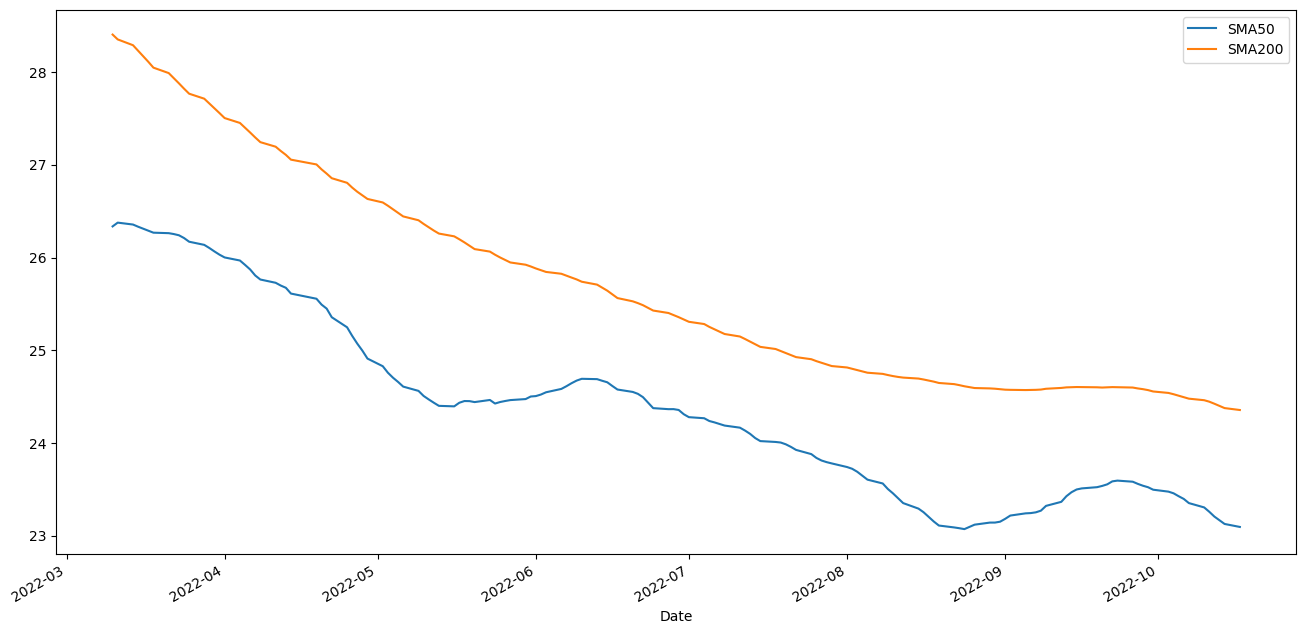

In [21]:
# plotting Close price and simple
# moving average of 30 days using .plot() method
# reliance[['Close', SMA50', 'SMA200']].plot(label='RELIANCE', figsize=(16, 8))
reliance[['SMA50', 'SMA200']].plot(label='RELIANCE', figsize=(16, 8))


In [22]:
df.to_csv('stocks.csv')

In [24]:

# API_TOKEN = '63474c54442c02.21685512'
# STOCK = 'AAPL.US'
# STOCK = 'VWS.CO'
# # STOCK = '0P0000FYPU.F'
# url = f"https://eodhistoricaldata.com/api/eod/{STOCK}?api_token={API_TOKEN}&order=d&fmt=json"

# response = urllib.request.urlopen(url)

# data = json.loads(response.read())

# data